## Libraries

In [1]:
import requests
import matplotlib.pyplot as plt
import statistics
import pandas as pd

## Global Values

In [1]:
api_key = "4ad86eef3a1dd72683dca94945a34142"
company = "AAPL" # ticket
years_api = 5 # max. is 5 years
divider = 1_000_000_000 # by default set to 1 billion
units = "billions" # units from y-axis

# graphs styles
plt.rcParams['font.size'] = 12
plt.rcParams["font.family"] = "Roboto"
plt.rc('axes', axisbelow=True)
colors = {
    "primary": "#0668E1",
    "secondary": "#1C2B33"
}

NameError: name 'plt' is not defined

## Queries

In [3]:
income_statement = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years_api}&apikey={api_key}")
income_statement = income_statement.json()

balance_sheet = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={years_api}&apikey={api_key}")
balance_sheet = balance_sheet.json()

cash_flow = requests.get(f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?limit={years_api}&apikey={api_key}")
cash_flow = cash_flow.json()

stock_price = requests.get(f"https://financialmodelingprep.com/api/v3/quote-short/{company}?apikey={api_key}")
stock_price = stock_price.json()

## Income Statement

62416000000

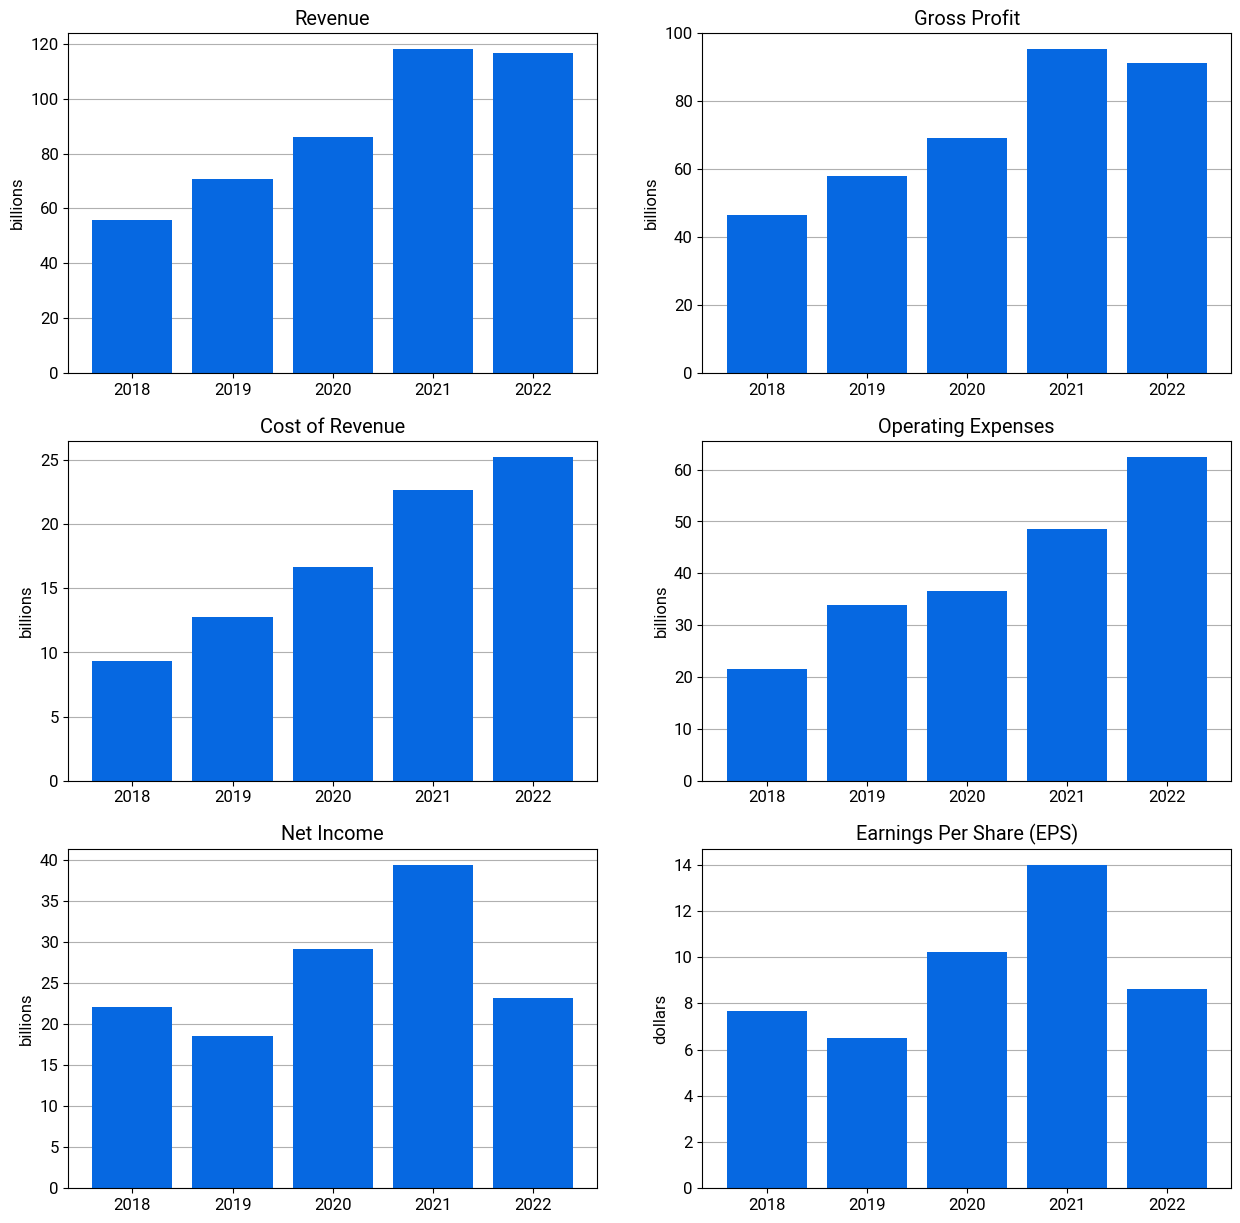

In [8]:
years = []
revenues = []
gross_profit = []
cost_revenue = []
operating_expenses = []
net_income = []
eps = []

for statement in income_statement:
    years.append(statement["calendarYear"])
    revenues.append(statement["revenue"] / divider)
    gross_profit.append(statement["grossProfit"] / divider)
    cost_revenue.append(statement["costOfRevenue"] / divider)
    operating_expenses.append(statement["operatingExpenses"] / divider)
    net_income.append(statement["netIncome"] / divider)
    eps.append(statement["eps"])
    
# reverse arrays to display 2018 first
years = years[::-1]
revenues = revenues[::-1]
gross_profit = gross_profit[::-1]
cost_revenue = cost_revenue[::-1]
operating_expenses = operating_expenses[::-1]
net_income = net_income[::-1]
eps = eps[::-1]
  
fig, ((ax_1, ax_2), (ax_3, ax_4), (ax_5, ax_6)) = plt.subplots(3, 2, figsize=(15, 15))
ax_1.bar(years, revenues, color=colors["primary"])
ax_1.set_title("Revenue")
ax_1.set_ylabel(units)
ax_1.set_axisbelow(True)
ax_1.grid(axis="y")

ax_2.bar(years, gross_profit, color=colors["primary"])
ax_2.set_title("Gross Profit")
ax_2.set_ylabel(units)
ax_2.set_axisbelow(True)
ax_2.grid(axis="y")

ax_3.bar(years, cost_revenue, color=colors["primary"])
ax_3.set_title("Cost of Revenue")
ax_3.set_ylabel(units)
ax_3.set_axisbelow(True)
ax_3.grid(axis="y")

ax_4.bar(years, operating_expenses, color=colors["primary"])
ax_4.set_title("Operating Expenses")
ax_4.set_ylabel(units)
ax_4.set_axisbelow(True)
ax_4.grid(axis="y")

ax_5.bar(years, net_income, color=colors["primary"])
ax_5.set_title("Net Income")
ax_5.set_ylabel(units)
ax_5.set_axisbelow(True)
ax_5.grid(axis="y")

ax_6.bar(years, eps, color=colors["primary"])
ax_6.set_title("Earnings Per Share (EPS)")
ax_6.set_ylabel('dollars')
ax_6.set_axisbelow(True)
ax_6.grid(axis="y")

income_statement[0]["operatingExpenses"]

## Balance Sheet

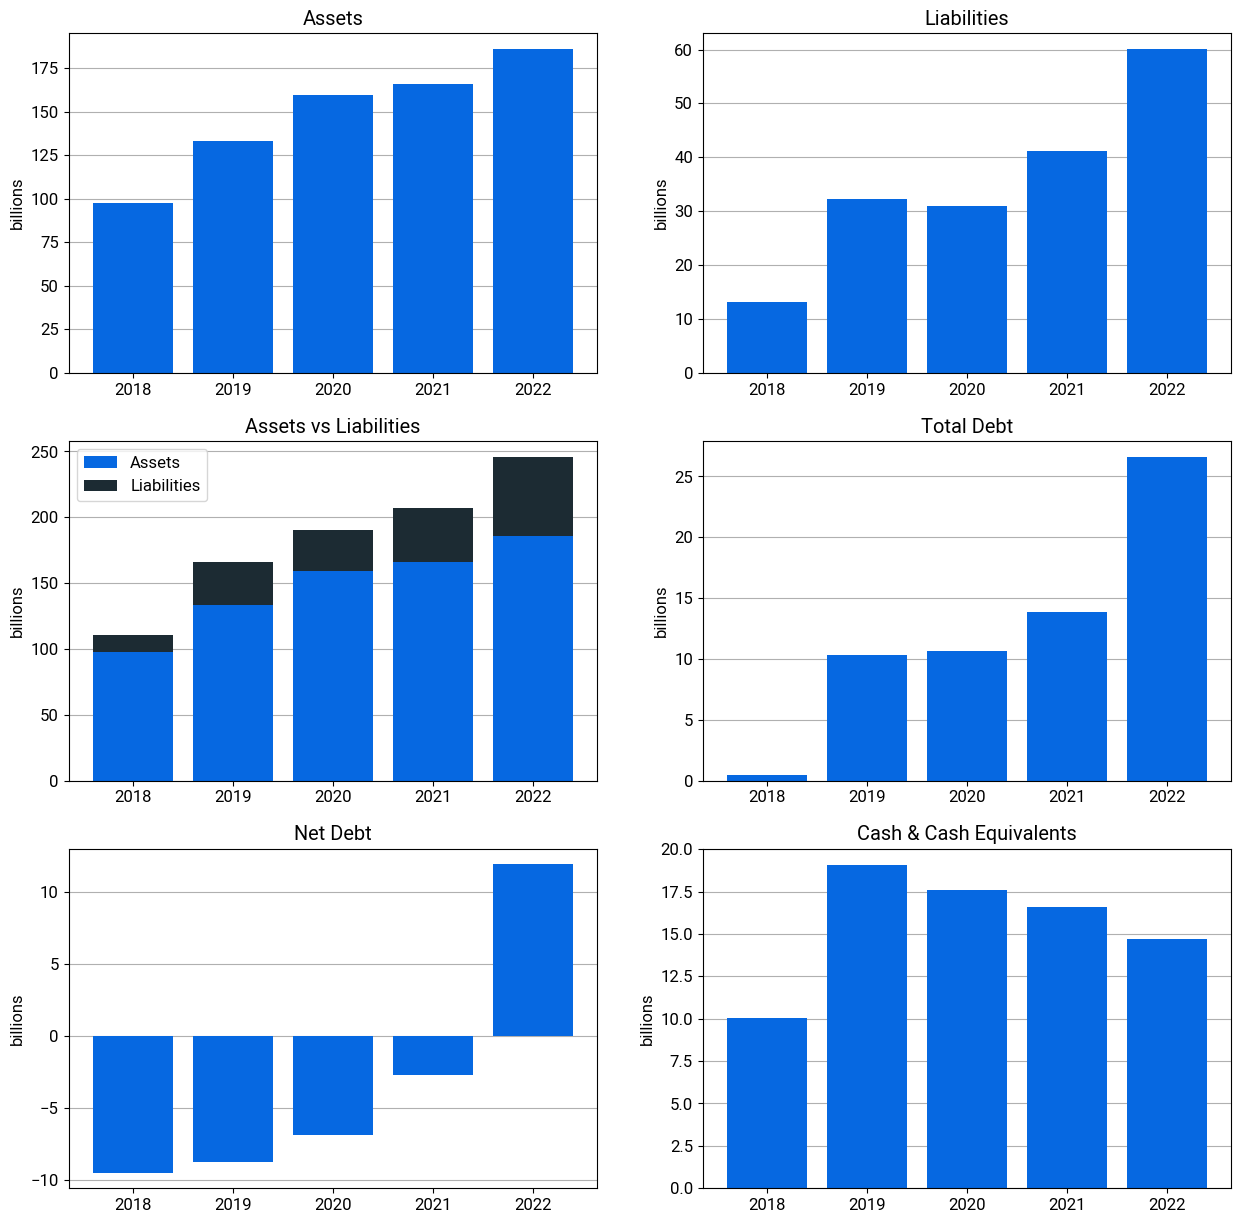

In [9]:
years = []
assets = []
liabilities = []
total_debt = []
net_debt = []
cash = []

for balance in balance_sheet:
    years.append(balance["calendarYear"]) 
    assets.append(balance["totalAssets"] / divider)
    liabilities.append(balance["totalLiabilities"] / divider)
    total_debt.append(balance["totalDebt"] / divider)
    net_debt.append(balance["netDebt"] / divider)
    cash.append(balance["cashAndCashEquivalents"] / divider)

# reverse arrays to display 2018 first
years = years[::-1]
assets = assets[::-1]
liabilities = liabilities[::-1]
total_debt = total_debt[::-1]
net_debt = net_debt[::-1]
cash = cash[::-1]

fig, ((ax_1, ax_2), (ax_3, ax_4), (ax_5, ax_6)) = plt.subplots(3, 2, figsize=(15, 15))

ax_1.bar(years, assets, color=colors["primary"])
ax_1.set_title("Assets")
ax_1.set_ylabel(units)
ax_1.set_axisbelow(True)
ax_1.grid(axis="y")

ax_2.bar(years, liabilities, color=colors["primary"])
ax_2.set_title("Liabilities")
ax_2.set_ylabel(units)
ax_2.set_axisbelow(True)
ax_2.grid(axis="y")

ax_3.bar(years, assets, label="Assets", color=colors["primary"])
ax_3.bar(years, liabilities, label="Liabilities", bottom=assets, color=colors["secondary"])
ax_3.set_title("Assets vs Liabilities")
ax_3.legend()
ax_3.set_ylabel(units)
ax_3.set_axisbelow(True)
ax_3.grid(axis="y")

ax_4.bar(years, total_debt, color=colors["primary"])
ax_4.set_title("Total Debt")
ax_4.set_ylabel(units)
ax_4.set_axisbelow(True)
ax_4.grid(axis="y")

ax_5.bar(years, net_debt, color=colors["primary"])
ax_5.set_title("Net Debt")
ax_5.set_ylabel(units)
ax_5.set_axisbelow(True)
ax_5.grid(axis="y")

ax_6.bar(years, cash, color=colors["primary"])
ax_6.set_title("Cash & Cash Equivalents")
ax_6.set_ylabel(units)
ax_6.set_axisbelow(True)
ax_6.grid(axis="y")

## Cash Flow

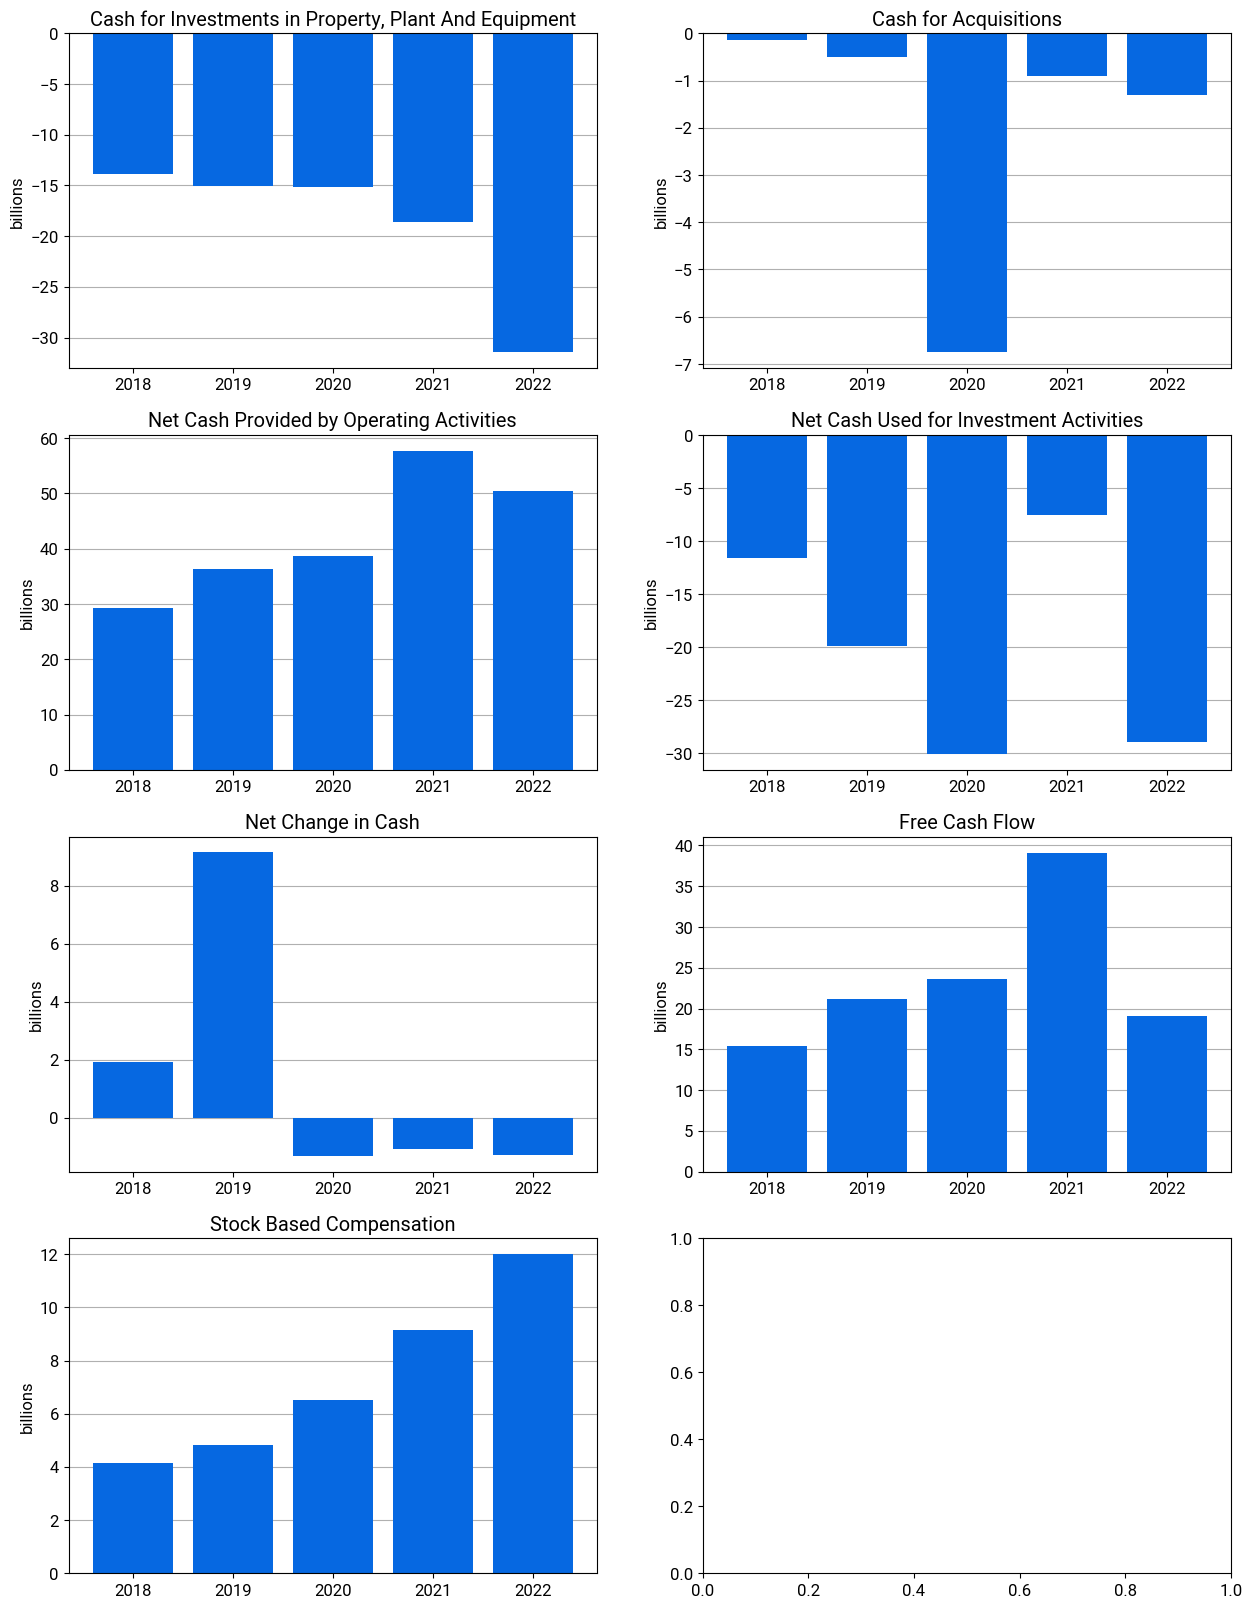

In [10]:
years = []
net_cash_operating = []
investments = []
acquisitions = []
net_cash_investing = []
free_cash_flow = []
net_cash = []
compensation = []

for cash in cash_flow:
    years.append(cash["calendarYear"])
    net_cash_operating.append(cash["netCashProvidedByOperatingActivities"] / divider)    
    acquisitions.append(cash["acquisitionsNet"] / divider)
    net_cash_investing.append(cash["netCashUsedForInvestingActivites"] / divider)
    investments.append(cash["investmentsInPropertyPlantAndEquipment"] / divider)
    free_cash_flow.append(cash["freeCashFlow"] / divider)
    net_cash.append(cash["netChangeInCash"] / divider)
    compensation.append(cash["stockBasedCompensation"] / divider)
    
years = years[::-1]
net_cash_operating = net_cash_operating[::-1]
investments = investments[::-1]
acquisitions = acquisitions[::-1]
net_cash_investing = net_cash_investing[::-1]
free_cash_flow = free_cash_flow[::-1]
net_cash = net_cash[::-1]
compensation = compensation[::-1]

fig, ((ax_1, ax_2), (ax_3, ax_4), (ax_5, ax_6), (ax_7, ax_8)) = plt.subplots(4, 2, figsize=(15, 20))

ax_1.bar(years, investments, color=colors["primary"])
ax_1.set_title("Cash for Investments in Property, Plant And Equipment")
ax_1.set_ylabel(units)
ax_1.set_axisbelow(True)
ax_1.grid(axis="y")

ax_2.bar(years, acquisitions, color=colors["primary"])
ax_2.set_title("Cash for Acquisitions")
ax_2.set_ylabel(units)
ax_2.set_axisbelow(True)
ax_2.grid(axis="y")

ax_3.bar(years, net_cash_operating, color=colors["primary"])
ax_3.set_title("Net Cash Provided by Operating Activities")
ax_3.set_ylabel(units)
ax_3.set_axisbelow(True)
ax_3.grid(axis="y")

ax_4.bar(years, net_cash_investing, color=colors["primary"])
ax_4.set_title("Net Cash Used for Investment Activities")
ax_4.set_ylabel(units)
ax_4.set_axisbelow(True)
ax_4.grid(axis="y")

ax_5.bar(years, net_cash, color=colors["primary"])
ax_5.set_title("Net Change in Cash")
ax_5.set_ylabel(units)
ax_5.set_axisbelow(True)
ax_5.grid(axis="y")

ax_6.bar(years, free_cash_flow, color=colors["primary"])
ax_6.set_title("Free Cash Flow")
ax_6.set_ylabel(units)
ax_6.set_axisbelow(True)
ax_6.grid(axis="y")

ax_7.bar(years, compensation, color=colors["primary"])
ax_7.set_title("Stock Based Compensation")
ax_7.set_ylabel(units)
ax_7.set_axisbelow(True)
ax_7.grid(axis="y")

## Ratios

In [ ]:
current_ratio = round(balance_sheet[0]["totalCurrentAssets"] / balance_sheet[0]["totalCurrentLiabilities"], 2)
cash_ratio = round(balance_sheet[0]["cashAndCashEquivalents"] / balance_sheet[0]["totalCurrentLiabilities"], 2)
gross_margin = round((income_statement[0]["grossProfit"] / income_statement[0]["revenue"]) * 100, 2)
operating_margin = round((income_statement[0]["operatingIncome"] / income_statement[0]["revenue"]) * 100, 2)
profit_margin = round((income_statement[0]["netIncome"] / income_statement[0]["revenue"]) * 100, 2)
roe = round((income_statement[0]["netIncome"] / balance_sheet[0]["totalStockholdersEquity"]) * 100, 2)

print(f"Current Ratio: {current_ratio}\nCash Ratio: {cash_ratio}\nGross Profit Margin: {gross_margin}%\nOperating Margin: {operating_margin}%\nProfit Margin: {profit_margin}%\nROE: {roe}%")

## Calculate Intrinsic Value

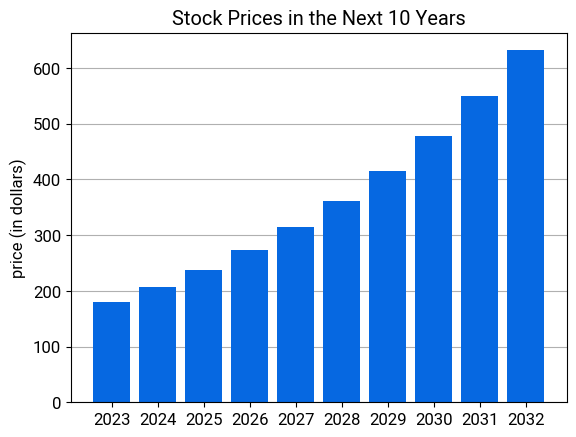

In [13]:
revenues = []
years = []
future_years = []
current_year = int(income_statement[0]["calendarYear"])
growth = []
eps = [income_statement[0]["eps"]]
avg_return = 0.15 # expected return (15%) in 10 years
stock_prices = []
margin_of_safety = 0.50 # margin of safety of 30%

for income in income_statement:
    years.append(income["calendarYear"])
    revenues.append(income["revenue"])

revenues = revenues[::-1]
years = years[::-1]

for i in range(1, len(years)):
    growth.append(((revenues[i] - revenues[i - 1]) / (revenues[i - 1])))

avg_growth = statistics.fmean(growth) * 0.85 # avg growth in last 5 years with a 15% margin of safety
pe_ratio_current = stock_price[0]["price"] / income_statement[0]["eps"] # updated p/e ratio
pe_ratio_calculated = (avg_growth * 2) * 100

# calculate eps for the next 10 years
for i in range(1, 10):
    current_eps = eps[i - 1] + (eps[i - 1] * avg_growth)
    eps.append(current_eps)

# calculate stock price in 10 years
future_stock_price = eps[-1] * pe_ratio_current
stock_prices.append(future_stock_price)

for i in range(1, 10):
    current_stock_price = stock_prices[i - 1] / (1 + avg_return)
    stock_prices.append(current_stock_price)
    
stock_prices = [price * margin_of_safety for price in stock_prices] # apply a margin of safety to stock calculated prices
stock_prices = stock_prices[::-1]

for year in range(current_year + 1, current_year + 11):
    future_years.append(year)
    
plt.bar(future_years, stock_prices, color=colors["primary"])
plt.title("Stock Prices in the Next 10 Years")
plt.grid(axis="y")
plt.ylabel("price (in dollars)")
plt.xticks(future_years)
plt.show()

In [14]:
future_stock_prices = pd.DataFrame(stock_prices, index=future_years, columns=["Stock Prices"])
future_stock_prices

,Stock Prices
2023,179.644420
2024,206.591083
2025,237.579746
2026,273.216708
2027,314.199214
2028,361.329096
2029,415.528461
2030,477.857730
2031,549.536389
2032,631.966848
